In [1]:
# Let's start by initializing the database
# matplotlib inline
from nuscenes.nuscenes import NuScenes
import numpy as np
import matplotlib.pyplot as plt
import pcl

nusc = NuScenes(version='v0.1', dataroot='/data/nuscenes', verbose=True)


Loading NuScenes tables for version v0.1 ...
23 category,
8 attribute,
5 visibility,
6975 instance,
12 sensor,
1200 calibrated_sensor,
304715 ego_pose,
12 log,
100 scene,
3977 sample,
304715 sample_data,
99952 sample_annotation,
12 map,
Done loading in 4.7 seconds.
Reverse indexing ...
Done reverse indexing in 1.3 seconds.


In [32]:
# show picture
filename = 'pic_tmp'
nusc.render_pointcloud_channel(filename)

In [35]:
# show picture
filename = 'pre_tmp'
nusc.render_pointcloud_channel(filename)

In [25]:
# Get test token
my_scene_token = nusc.field2token('scene', 'name', 'scene-0001')[0]
scene_rec = nusc.get('scene',my_scene_token)
sample_rec = nusc.get('sample',scene_rec['first_sample_token'])
sample_token_list = nusc.save_sample_token(sample_rec['token'])

for sample_id in sample_token_list:
    sm_rec = nusc.get('sample',sample_id)
    print(sm_rec['data']['LIDAR_TOP'])

3388933b59444c5db71fade0bbfef470
69b793ec8dc44e2fbd33d8cdd16b5a31
ec310d318e6a46c08c43311dd898f0a5
06cc88304ecb463380e56863539bc75d
66adb5d922e74abb83d552d209e95849
e68c66ab18ac4e049321ba61591496b0
a120c8986a4d432ab34e962189c7c330
52b16c3d37494892a27d66a1bce8f04b
30af13f6e00747998fc4a4f4fe7734d2
79291513f7244f0996d60c351fd96186
a542598b82e64f46b46d749d95ca3933
59bdcf05093f46d79e149e35d0090126
e17d40d53225461d87d40a97f18eb0c2
d001097c1fd340f3aad2cca489bec144
8bf1b6f0c89d47be9f1b9c579c2f1d5b
7bbc029e26bf40678c8b7f3fc745e51b
b73788ceab7745ae8b1c2e12076f4288
41fd83cefd8243a3af126742044f8f49
49730fe120bf41b48eaaa297859b213c
cad306a971704749aae7674f5cd4f2f4
946b839480be46a3ae1ddcb359079f6d
547edb3469e44961ba68b3955046c8d6
155a5109b4594be0aaf98105928459af
737e1201992b4a8e9648b0b2208c994d
ee33166a237a49a4997bedfb007c95f9
c755a558e8da407abd92a31689a4f08a
93958a30168143c8abee5a8c29c89f49
dd1e2e1c6272428ea6425bba3802e2b7
075bae7969754f2c959a2d2a61bcb481
2d9546d036384151b33d9c584053d0df
9a11ac9395

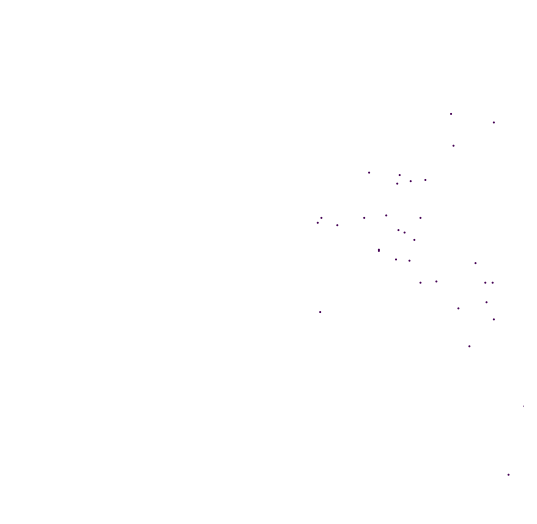

In [16]:
# Get points data
# points = nusc.get_pointcloud_position(sample_rec['data']['LIDAR_TOP'])
points = nusc.get_pointcloud_position(sm_rec['data']['RADAR_FRONT'])

In [17]:
import pcl
import numpy as np
import scipy.io as scio
points_fig = points
scio.savemat('pointcloud_fig.mat', {'A':points})
points = points.astype(np.float32)
scio.savemat('pointcloud.mat', {'A':points})
cloud = pcl.PointCloud(points.T)

In [18]:
# save as mat
# import scipy.io as scio
# scio.savemat('pointcloud.mat', {'A':points})

In [19]:
# -*- coding: utf-8 -*-
# Euclidean Cluster Extraction
# http://pointclouds.org/documentation/tutorials/cluster_extraction.php#cluster-extraction
import numpy as np
import pcl
import scipy.io as scio

# int main (int argc, char** argv)
# {
#   // Read in the cloud data
#   pcl::PCDReader reader;
#   pcl::PointCloud<pcl::PointXYZ>::Ptr cloud (new pcl::PointCloud<pcl::PointXYZ>), cloud_f (new pcl::PointCloud<pcl::PointXYZ>);
#   reader.read ("table_scene_lms400.pcd", *cloud);
#   std::cout << "PointCloud before filtering has: " << cloud->points.size () << " data points." << std::endl; //*

#   // Create the filtering object: downsample the dataset using a leaf size of 1cm
#   pcl::VoxelGrid<pcl::PointXYZ> vg;
#   pcl::PointCloud<pcl::PointXYZ>::Ptr cloud_filtered (new pcl::PointCloud<pcl::PointXYZ>);
#   vg.setInputCloud (cloud);
#   vg.setLeafSize (0.01f, 0.01f, 0.01f);
#   vg.filter (*cloud_filtered);
#   std::cout << "PointCloud after filtering has: " << cloud_filtered->points.size ()  << " data points." << std::endl; //*
vg = cloud.make_voxel_grid_filter()
vg.set_leaf_size (0.01, 0.01, 0.01)
cloud_filtered = vg.filter ()

#   // Create the segmentation object for the planar model and set all the parameters
#   pcl::SACSegmentation<pcl::PointXYZ> seg;
#   pcl::PointIndices::Ptr inliers (new pcl::PointIndices);
#   pcl::ModelCoefficients::Ptr coefficients (new pcl::ModelCoefficients);
#   pcl::PointCloud<pcl::PointXYZ>::Ptr cloud_plane (new pcl::PointCloud<pcl::PointXYZ> ());
#   pcl::PCDWriter writer;
#   seg.setOptimizeCoefficients (true);
#   seg.setModelType (pcl::SACMODEL_PLANE);
#   seg.setMethodType (pcl::SAC_RANSAC);
#   seg.setMaxIterations (100);
#   seg.setDistanceThreshold (0.02);
seg = cloud.make_segmenter()
seg.set_optimize_coefficients (True)
seg.set_model_type (pcl.SACMODEL_PLANE)
seg.set_method_type (pcl.SAC_RANSAC)
seg.set_MaxIterations (100)
seg.set_distance_threshold (0.02)

#   int i=0, nr_points = (int) cloud_filtered->points.size ();
#   while (cloud_filtered->points.size () > 0.3 * nr_points)
#   {
#     // Segment the largest planar component from the remaining cloud
#     seg.setInputCloud (cloud_filtered);
#     seg.segment (*inliers, *coefficients);
#     if (inliers->indices.size () == 0)
#     {
#       std::cout << "Could not estimate a planar model for the given dataset." << std::endl;
#       break;
#     }
#     // Extract the planar inliers from the input cloud
#     pcl::ExtractIndices<pcl::PointXYZ> extract;
#     extract.setInputCloud (cloud_filtered);
#     extract.setIndices (inliers);
#     extract.setNegative (false);
# 
#     // Get the points associated with the planar surface
#     extract.filter (*cloud_plane);
#     std::cout << "PointCloud representing the planar component: " << cloud_plane->points.size () << " data points." << std::endl;
# 
#     // Remove the planar inliers, extract the rest
#     extract.setNegative (true);
#     extract.filter (*cloud_f);
#     *cloud_filtered = *cloud_f;
#   }

i = 0
nr_points = cloud_filtered.size
# while nr_points > 0.3 * nr_points:
#     # Segment the largest planar component from the remaining cloud
#     [inliers, coefficients] = seg.segment()
#     # extract = cloud_filtered.extract()
#     # extract = pcl.PointIndices()
#     cloud_filtered.extract(extract)
#     extract.set_Indices (inliers)
#     extract.set_Negative (false)
#     cloud_plane = extract.filter ()
#     
#     extract.set_Negative (True)
#     cloud_f = extract.filter ()
#     cloud_filtered = cloud_f


# Creating the KdTree object for the search method of the extraction
# pcl::search::KdTree<pcl::PointXYZ>::Ptr tree (new pcl::search::KdTree<pcl::PointXYZ>);
# tree->setInputCloud (cloud_filtered);
tree = cloud_filtered.make_kdtree()
# tree = cloud_filtered.make_kdtree_flann()


# std::vector<pcl::PointIndices> cluster_indices;
# pcl::EuclideanClusterExtraction<pcl::PointXYZ> ec;
# ec.setClusterTolerance (0.02); // 2cm
# ec.setMinClusterSize (100);
# ec.setMaxClusterSize (25000);
# ec.setSearchMethod (tree);
# ec.setInputCloud (cloud_filtered);
# ec.extract (cluster_indices);
ec = cloud_filtered.make_EuclideanClusterExtraction()
ec.set_ClusterTolerance (0.02)
ec.set_MinClusterSize (100)
ec.set_MaxClusterSize (25000)
ec.set_SearchMethod (tree)
cluster_indices = ec.Extract()

print('cluster_indices : ' + str(cluster_indices.count) + " count.")
# print('cluster_indices : ' + str(cluster_indices.indices.max_size) + " count.")

#   int j = 0;
#   for (std::vector<pcl::PointIndices>::const_iterator it = cluster_indices.begin (); it != cluster_indices.end (); ++it)
#   {
#     pcl::PointCloud<pcl::PointXYZ>::Ptr cloud_cluster (new pcl::PointCloud<pcl::PointXYZ>);
#     for (std::vector<int>::const_iterator pit = it->indices.begin (); pit != it->indices.end (); ++pit)
#       cloud_cluster->points.push_back (cloud_filtered->points[*pit]); //*
#     cloud_cluster->width = cloud_cluster->points.size ();
#     cloud_cluster->height = 1;
#     cloud_cluster->is_dense = true;
# 
#     std::cout << "PointCloud representing the Cluster: " << cloud_cluster->points.size () << " data points." << std::endl;
#     std::stringstream ss;
#     ss << "cloud_cluster_" << j << ".pcd";
#     writer.write<pcl::PointXYZ> (ss.str (), *cloud_cluster, false); //*
#     j++;
#   }
# 

cloud_cluster = pcl.PointCloud()
obj_line = np.empty([len(cluster_indices),3],dtype = float)
for j, indices in enumerate(cluster_indices):
    # cloudsize = indices
    print('indices = ' + str(len(indices)))
    # cloudsize = len(indices)
    points = np.zeros((len(indices), 3), dtype=np.float32)
    # points = np.zeros((cloudsize, 3), dtype=np.float32)
    
    # for indice in range(len(indices)):
    for i, indice in enumerate(indices):
        # print('dataNum = ' + str(i) + ', data point[x y z]: ' + str(cloud_filtered[indice][0]) + ' ' + str(cloud_filtered[indice][1]) + ' ' + str(cloud_filtered[indice][2]))
        # print('PointCloud representing the Cluster: ' + str(cloud_cluster.size) + " data points.")
        points[i][0] = cloud_filtered[indice][0]
        points[i][1] = cloud_filtered[indice][1]
        points[i][2] = cloud_filtered[indice][2]

    x_mean = (points[:,0].max()+points[:,0].min())/2
    y_mean = (points[:,1].max()+points[:,1].min())/2
    loc_dot= np.hstack((x_mean,y_mean))
    
    x_det = points[:,0].max()-points[:,0].min()
    y_det = points[:,0].max()-points[:,0].min()
    radius = (x_det+y_det)/2

    obj_line[j,:] = np.hstack((loc_dot,radius))
    
    x_mean = (points[:,0].max()+points[:,0].min())/2
    y_mean = (points[:,1].max()+points[:,1].min())/2
    loc_dot= np.hstack((x_mean,y_mean))
    
    x_det = points[:,0].max()-points[:,0].min()
    y_det = points[:,0].max()-points[:,0].min()
    radius = (x_det+y_det)/2
          
    cloud_cluster.from_array(points)

#     ss = "cloud_cluster_" + str(j) + ".pcd";
#     pcl.save(cloud_cluster, ss)

    obj_line[j,:] = np.hstack((loc_dot,radius))
#     ss_matlab = "cloud_cluster_" + str(j) + ".mat";
#     scio.savemat(ss_matlab, {'A':cloud_cluster})


cluster_indices : <built-in method count of list object at 0x7f2e4bcc5348> count.


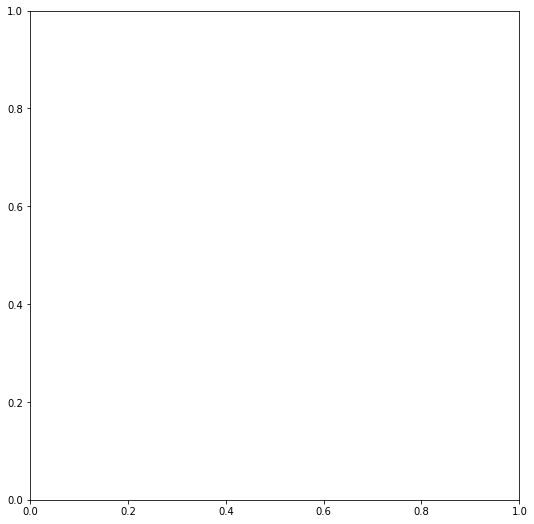

In [20]:
# plot prediction by obj_mean
pre_id = 0
nusc.plot_pointcloud_prediction(points_fig, obj_line, pre_id)

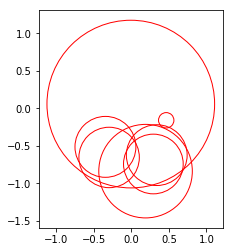

8

In [23]:
from matplotlib.patches import Ellipse, Circle
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)
for i in range(obj_line.shape[0]):
    cir1 = Circle(xy = (obj_line[i][0], obj_line[i][1]), radius=obj_line[i][2], color ='r', fill=False) 
    ax.add_patch(cir1)
plt.axis('scaled')

plt.show()

obj_line.shape[0]

